<a href="https://colab.research.google.com/github/hasanalay/ML/blob/main/Iris_KMean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

İlk aşamada gerekli kütüphaneleri import ederek başlıyoruz.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import datasets


İkinci kod hücresinde ise elimizdeki veriyi görselleştirmek için seabnorn kütüphanesini import ediyoruz.

sns.set(style='darkgrid') olarak belirttiğimiz satırda olluşturduğumuz grafiğin görüntüsünü tema olarak belirleyebiliyoruz. Burada whitegrid, white, dark olarak seçenekler de mevcut.

Yine bu hücrede warnings kütühphanesini ekleyip hataları görmezden geliyoruz.

In [17]:
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Üçüncü kod bloğunda, pandas kütüphanesine ait pd.read_csv fonksiyonu ile Iris.csv datasetmizi okuyarak bir dataframe oluşturuyoruz.

In [3]:
df_iris = pd.read_csv('/content/sample_data/Iris.csv')

Dördüncü kod bloğunda, oluşturduğumuz df_iris dataframe'inin bilgilerine bakabilmemiz için pandas kütüphanesine ait info() fonksiyonunu çalıştırıyoruz. info fonksiyonu ile index dtype ve column dtypes, non-null değerler ve bellek kullanımı gibi verilere erişebliriz.

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Beşinci kod bloğunda, pandas kütüphanesine ait describe() fonksiyonu ile df_iris dataframe'ine ait count, mean, median, standart deviation (standart sapma), min, max gibi istatistiksel verilere ulaşmamızı sağlar.

In [5]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


seaborn kütüphanesine ait pairplot() fonksiyonuyla, tüm veri çerçevesi boyunca, sayısal sütunlar için çift yönlü ilişkiler çizebiliriz.

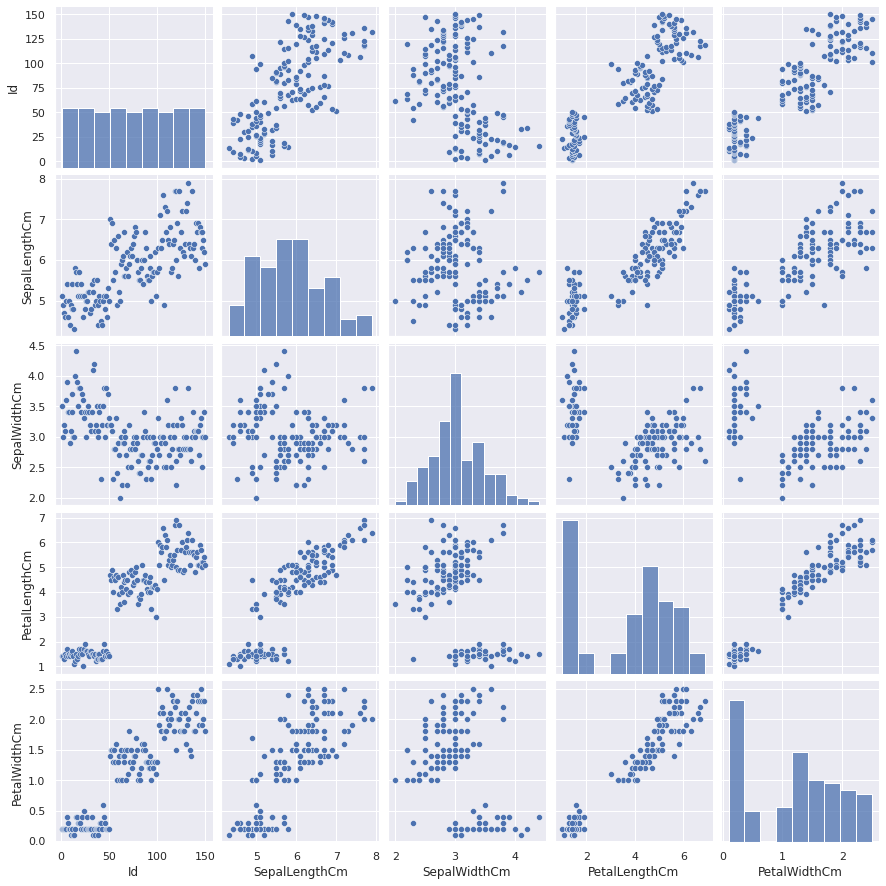

In [18]:
sns.pairplot(df_iris)

df_iris dataframe üzerinde sırasıyla 1,2,3,4 numaralı indekslerdeki SepalLengthCm, SepalWidthCm,	PetalLengthCm,	PetalWidthCm verilerinde denk gelen kolonlardaki verileri x değişkenine kaydediyoruz.

In [7]:
x = df_iris.iloc[:, [1, 2, 3, 4]].values

Sekizinci kod bloğunda, k-mean için en optimum kümeleme merkezi sayısını bulabilmek için for döngüsünden faydalandık. aşağıdaki kod satırlarında da bu değerler için matplotlib.pyplot'u kullanarak **The elbow method** adında bir grafik oluşturuyoruz. Oluşturduğumuz grafiğin eksen adları ise şöyle: **Clusters Sum of Square (WCSS)** , **Number of clusters**. plt.show() diyerek de grafiği yazdırıyoruz.

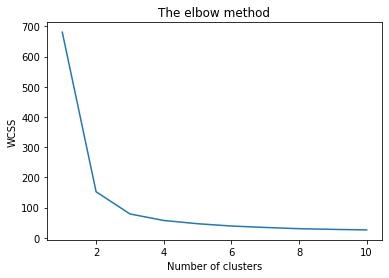

In [8]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Dokuzuncu kod bloğunda da, bir önceki grafkten de anladığımız üzere k-mean için cluster merkezi sayısını 3 olarak belirtiyoruz. Burada KMeans fonkiyonunda kullandığımız parametreleri anlatmak gerekitse
- n_clusters: kaç adet kümeleme(cluster) merkezinin olacağını belirttiğimiz parametredir.
- init: initialization için kullanılan methoddur. Burada k-means++ dememizin sebebi de şudur. "Yakınsamayı hızlandırmak için k-mean kümeleme için ilk küme merkezlerini akıllı bir şekilde seçer" olarak dökümentasyondan direkt olarak çevirebiliriz.
- max_iter: Default olarak 300 verilen bu değer, k-mean algoritmasının bir kez çalıştırılmasında maksimum olarak kaç adet iterasyon olacağını belirtiğimiz değerdir.
- n_init: default olarak 10 verilen bu değer, k-means algoritmasının farklı kümeleme merkezi ile kaç defa çalıştırılacağını belirtir.
- random_state: Default olarak None olarak verilen bu değer, KMeans algoritmasının random değer verilerek lokal minimum noktalarında sıkışıp kalmasını engellemek için randomize eder.




y_kmeans = kmeans.fit_predict(x) satırında da, *kmeans* değişkeninde aldığımız parametreleri hesaplıyor ve *y_kmeans* değişkenine atıyorz.

In [9]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Onuncu kod bloğunda, hesapladığımız kümeleme merkezlerimizi görselleştirebilmek için matplotlib.pyplot'den faydalanıyoruz. Oluşturacağımız Scatter diyagramında Iris çiçeğininin üç farklı türü için gerekli parametreleri veriyoruz.
- position(x): verinin poziyonunu verdiğimiz parametredir.
- shape(s): diyagramdaki notlaların boyutunu ayarlayabildiğimiz parametredir.
- color(c): Diyagramdaki noktaların rengini belirttiğimiz parametredir.
- label: O türdeki noktaların ismini verebildiğimiz parametre.


Daha sonrasında kümeleme merkezlerimizi aynı diyagaram üzerinde gösterebilmek için benzer adımları uyguluyoruz.

En son satırda da oluşturduğumuz diyagrama lejant ekliyoruz.

In [24]:
plt.legend?

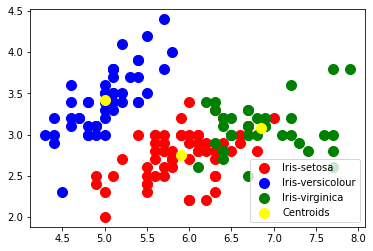

In [10]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()